# DataLoaders - Reading, Writing, Saving & Checkpointing

In [ ]:
xs = list(range(10))
ys = list(range(10,20))
print('xs values: ', xs)
print('ys values: ', ys)

xs values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ys values:  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
dataset = list(zip(xs,ys))
dataset[0] # returns the tuple (x[0], y[0])

(0, 10)

In [ ]:
len(dataset)

10

In [ ]:
#collapse-show

class MyDataset:
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys
    
    def __getitem__(self, i):
        return self.xs[i], self.ys[i]
    
    def __len__(self):
        return len(self.xs)

In [ ]:
dataset = MyDataset(xs, ys)
dataset[2] # returns the tuple (x[2], y[2])

(2, 12)

In [ ]:
from torch.utils.data import DataLoader

for x, y in DataLoader(dataset):
    print(x,y)

tensor([0]) tensor([10])
tensor([1]) tensor([11])
tensor([2]) tensor([12])
tensor([3]) tensor([13])
tensor([4]) tensor([14])
tensor([5]) tensor([15])
tensor([6]) tensor([16])
tensor([7]) tensor([17])
tensor([8]) tensor([18])
tensor([9]) tensor([19])


In [ ]:
for x, y in DataLoader(dataset, batch_size=2):
    print(x,y)

tensor([0, 1]) tensor([10, 11])
tensor([2, 3]) tensor([12, 13])
tensor([4, 5]) tensor([14, 15])
tensor([6, 7]) tensor([16, 17])
tensor([8, 9]) tensor([18, 19])


In [ ]:
for x, y in DataLoader(dataset, batch_size=2, shuffle=True):
    print(x,y)

tensor([2, 6]) tensor([12, 16])
tensor([0, 4]) tensor([10, 14])
tensor([7, 3]) tensor([17, 13])
tensor([1, 5]) tensor([11, 15])
tensor([9, 8]) tensor([19, 18])


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

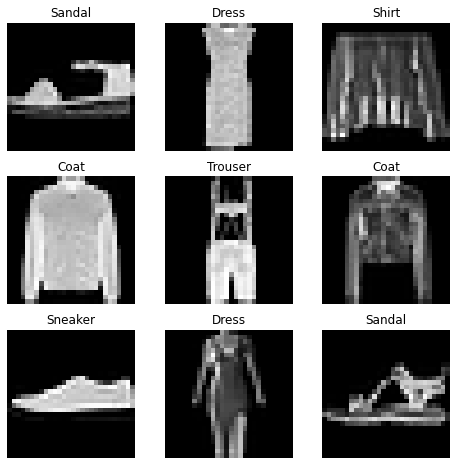

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


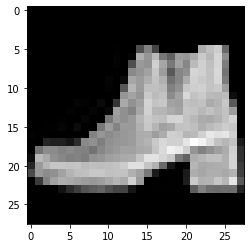

Label: 9


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")